# Pandas Series Cheat Sheet

In [1]:
import pandas as pd

## Create

In [2]:
pd.Series([1, 3, 2])

0    1
1    3
2    2
dtype: int64

In [3]:
ps = pd.Series([1, 3, 2], ['a', 'b', 'c'], name='PS', dtype=float)
ps

a    1.0
b    3.0
c    2.0
Name: PS, dtype: float64

In [4]:
ps.values

array([1., 3., 2.])

In [5]:
ps.index

Index(['a', 'b', 'c'], dtype='object')

## Accessing Elements

In [6]:
ps['b']

3.0

In [7]:
ps[0]

1.0

In [8]:
ps['a':'b']

a    1.0
b    3.0
Name: PS, dtype: float64

## Comparison and Filtering

In [9]:
ps

a    1.0
b    3.0
c    2.0
Name: PS, dtype: float64

In [10]:
ps > 1

a    False
b     True
c     True
Name: PS, dtype: bool

In [11]:
ps[ps > 1]

b    3.0
c    2.0
Name: PS, dtype: float64

In [12]:
ps[(ps > 1) & (ps < 3)]

c    2.0
Name: PS, dtype: float64

In [13]:
ps3 = pd.Series(['one', 'two', 'three'])
ps3[ps3.str.endswith('e')]

0      one
2    three
dtype: object

## Sorting

In [14]:
ps.sort_index()

a    1.0
b    3.0
c    2.0
Name: PS, dtype: float64

In [15]:
ps.sort_values()
# NOTE: Indices'follow' values through sorting

a    1.0
c    2.0
b    3.0
Name: PS, dtype: float64

In [16]:
ps
# NOTE: sort_xxx() returns a copy (inplace=False by default)

a    1.0
b    3.0
c    2.0
Name: PS, dtype: float64

In [17]:
ps.sort_index(ascending=False, inplace=True)
ps

c    2.0
b    3.0
a    1.0
Name: PS, dtype: float64

## Computation

In [18]:
ps.sum()

6.0

In [19]:
ps.max()

3.0

In [20]:
ps.mean()

2.0

In [21]:
ps.std()

1.0

## Vector Arithmetic

In [22]:
ps * 2

c    4.0
b    6.0
a    2.0
Name: PS, dtype: float64

## Series on Series Operations

In [23]:
ps1 = pd.Series([4, 5], ['a', 'c'])
ps1

a    4
c    5
dtype: int64

In [24]:
ps2 = ps + ps1
ps2
# NOTE: Elements are matched by Index!

a    5.0
b    NaN
c    7.0
dtype: float64

## Finding/Dropping/Filling Nulls(NaN)

In [25]:
ps2.isnull()

a    False
b     True
c    False
dtype: bool

In [26]:
ps2.notnull()

a     True
b    False
c     True
dtype: bool

In [27]:
ps2.dropna()
# NOTE: returns a copy (inplace=False by default)

a    5.0
c    7.0
dtype: float64

In [28]:
ps2.fillna(0, inplace=True)
ps2

a    5.0
b    0.0
c    7.0
dtype: float64

## Substitution

In [29]:
ps2

a    5.0
b    0.0
c    7.0
dtype: float64

In [30]:
ps2.replace(0, -1)

a    5.0
b   -1.0
c    7.0
dtype: float64

In [31]:
ps2.replace([5, 7], -2)

a   -2.0
b    0.0
c   -2.0
dtype: float64

In [32]:
ps2.replace({0: -1, 7: -2})
# NOTE: Skips over missing keys

a    5.0
b   -1.0
c   -2.0
dtype: float64

In [33]:
ps2.map({0: -1, 7: -2})
# NOTE: Missing keys result in nulls

a    NaN
b   -1.0
c   -2.0
dtype: float64

## Misc

In [34]:
df_dates = pd.DataFrame({'Date': pd.date_range('1/1/2020', periods=5, freq='2D')})
df_dates['Day'] = df_dates['Date'].dt.day
df_dates['DayOfWk'] = df_dates['Date'].dt.weekday
df_dates

,Date,Day,DayOfWk
0,2020-01-01,1,2
1,2020-01-03,3,4
2,2020-01-05,5,6
3,2020-01-07,7,1
4,2020-01-09,9,3


In [35]:
df

,ColA,ColB,ColC
X,1,2,3
Y,4,5,6
Z,7,8,9


In [36]:
df['ColA'].rolling(window=2).mean()

X    NaN
Y    2.5
Z    5.5
Name: ColA, dtype: float64

In [37]:
df['ColA'].cumsum()

X     1
Y     5
Z    12
Name: ColA, dtype: int64

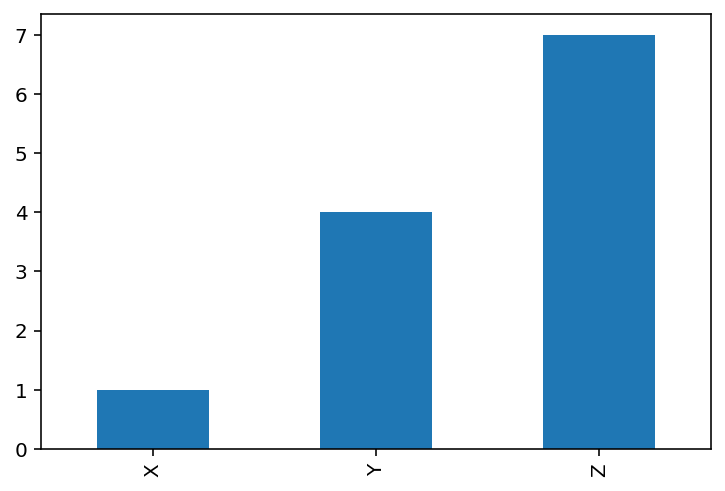

In [38]:
df['ColA'].plot(kind='bar');